In [47]:
from generate_grid.generate_grid import generate_sudoku
from generate_grid.generate_grid import is_valid
from implems.constraint import solve_sudoku_constraint
from implems.backtrack import solve_sudoku_backtracking
from utils.utils import process_sudoku_file
import time

In [48]:
# Initialisation des variables de test

nb_tests = 150
difficulty = 3

In [49]:
# Test solvers with random generated grids 

ok_constraint_tests = 0
ok_backtracking_tests = 0

time_constraint_tests = []
time_backtracking_tests = []

for i in range(nb_tests):
    # Generate a sudoku grid
    grid = generate_sudoku(difficulty)

    # Solve the sudoku grid using the constraint solver
    start = time.time()
    solution = solve_sudoku_constraint(grid)
    end = time.time()
    time_constraint_tests.append(end - start)

    # Solve the sudoku grid using the backtracking solver
    start = time.time()
    solution = solve_sudoku_backtracking(grid)
    end = time.time()
    time_backtracking_tests.append(end - start)


In [50]:
# Time comparative
print(len(time_constraint_tests))

average_time_constraint = sum(time_constraint_tests) / len(time_constraint_tests)
average_time_backtracking = sum(time_backtracking_tests) / len(time_backtracking_tests)

print("Average time for constraint solver: ", average_time_constraint)
print("Average time for backtracking solver: ", average_time_backtracking)

time_constraint_tests = []
time_backtracking_tests = []

150
Average time for constraint solver:  0.0022995503743489585
Average time for backtracking solver:  0.0016430250803629557


In [51]:
file_grids = process_sudoku_file("test.txt")

for grid in file_grids: 
    # Solve the sudoku grid using the constraint solver
    start = time.time()
    solution = solve_sudoku_constraint(grid)
    end = time.time()
    time_constraint_tests.append(end - start)

    # Solve the sudoku grid using the backtracking solver
    start = time.time()
    solution = solve_sudoku_backtracking(grid)
    end = time.time()
    time_backtracking_tests.append(end - start)

In [52]:
# Time comparative

print(len(time_constraint_tests))

average_time_constraint = sum(time_constraint_tests) / len(time_constraint_tests)
average_time_backtracking = sum(time_backtracking_tests) / len(time_backtracking_tests)

print("Average time for constraint solver: ", average_time_constraint)
print("Average time for backtracking solver: ", average_time_backtracking)




50
Average time for constraint solver:  0.005528588294982911
Average time for backtracking solver:  0.09161459922790527


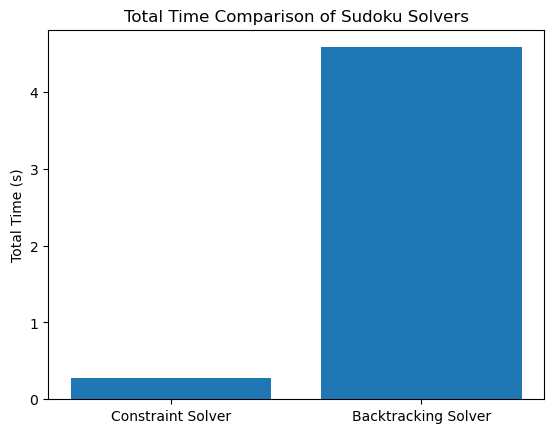

In [53]:
# plot un graphique avec deux courbes qui represente les valeurs des tableau average_time_constraint et average_time_backtracking
import matplotlib.pyplot as plt

plt.bar(['Constraint Solver', 'Backtracking Solver'], [sum(time_constraint_tests), sum(time_backtracking_tests)])
plt.ylabel('Total Time (s)')
plt.title('Total Time Comparison of Sudoku Solvers')
plt.show()



In [54]:
file_grids = process_sudoku_file("hard_test.txt")

for grid in file_grids: 
    # Solve the sudoku grid using the constraint solver
    start = time.time()
    solution = solve_sudoku_constraint(grid)
    end = time.time()
    time_constraint_tests.append(end - start)

    # Solve the sudoku grid using the backtracking solver
    start = time.time()
    solution = solve_sudoku_backtracking(grid)
    end = time.time()
    time_backtracking_tests.append(end - start)

KeyboardInterrupt: 

In [ ]:
# Time comparative

print(len(time_constraint_tests))

average_time_constraint = sum(time_constraint_tests) / len(time_constraint_tests)
average_time_backtracking = sum(time_backtracking_tests) / len(time_backtracking_tests)

print("Average time for constraint solver: ", average_time_constraint)
print("Average time for backtracking solver: ", average_time_backtracking)


425
Average time for constraint solver:  0.4457234281652114
Average time for backtracking solver:  1.1038215407203225


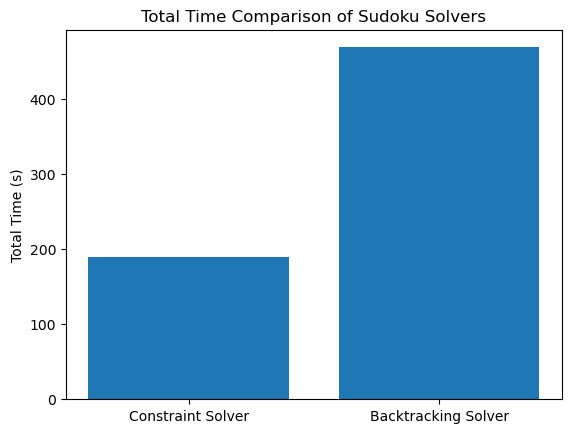

In [ ]:

plt.bar(['Constraint Solver', 'Backtracking Solver'], [sum(time_constraint_tests), sum(time_backtracking_tests)])
plt.ylabel('Total Time (s)')
plt.title('Total Time Comparison of Sudoku Solvers')
plt.show()


In [ ]:
from implems.norvig import solve_sudoku_norvig
from implems.mrv import solve_sudoku_mrv
from implems.dlx import solve_sudoku_dlx
from implems.genetic import solve_sudoku_genetic

In [ ]:
def test_all_solvers(grid):
    """
    Teste tous les solveurs disponibles sur une grille donnée et retourne leurs temps d'exécution.
    
    Args:
        grid: Une grille de Sudoku 9x9 représentée comme une liste de listes.
        
    Returns:
        Un dictionnaire des temps d'exécution pour chaque solveur.
    """
    solvers = {
        "Backtracking": solve_sudoku_backtracking,
        "Constraint": solve_sudoku_constraint,
        "Norvig": solve_sudoku_norvig,
        "MRV": solve_sudoku_mrv,
        "DLX": solve_sudoku_dlx
        # Note: Le solveur génétique est souvent beaucoup plus lent et moins fiable,
        # donc nous pouvons le tester séparément
    }
    
    times = {}
    for name, solver in solvers.items():
        start = time.time()
        solution = solver(grid)
        end = time.time()
        times[name] = end - start
    
    return times

In [ ]:
def run_benchmark(num_grids=10):
    """
    Exécute un benchmark de tous les solveurs sur plusieurs grilles générées aléatoirement.
    
    Args:
        num_grids: Nombre de grilles à tester.
        
    Returns:
        Un DataFrame avec les résultats du benchmark.
    """
    import pandas as pd
    
    results = []
    
    # Tester sur des grilles générées aléatoirement
    for i in range(num_grids):
        grid = generate_sudoku(difficulty='moyen')
        times = test_all_solvers(grid)
        times["Grid"] = i + 1
        results.append(times)
    
    # Convertir en DataFrame
    df = pd.DataFrame(results)
    
    # Réorganiser les colonnes pour avoir 'Grid' en premier
    cols = df.columns.tolist()
    cols.remove("Grid")
    cols = ["Grid"] + cols
    df = df[cols]
    
    return df

In [ ]:
benchmark_results = run_benchmark(10)
print(benchmark_results)

   Grid  Backtracking  Constraint    Norvig       MRV       DLX
0     1      0.001703    0.002160  0.001440  0.002512  0.008142
1     2      0.000440    0.002087  0.001348  0.001726  0.008436
2     3      0.032584    0.002141  0.001376  0.001962  0.007632
3     4      0.001884    0.002084  0.001477  0.001901  0.007674
4     5      0.002709    0.002322  0.001482  0.002199  0.007109
5     6      0.002241    0.002183  0.001304  0.002121  0.006657
6     7      0.000573    0.002149  0.001301  0.001438  0.006760
7     8      0.001233    0.002095  0.001503  0.001329  0.007038
8     9      0.000352    0.002046  0.001403  0.001687  0.006779
9    10      0.001168    0.002025  0.001299  0.001549  0.006428


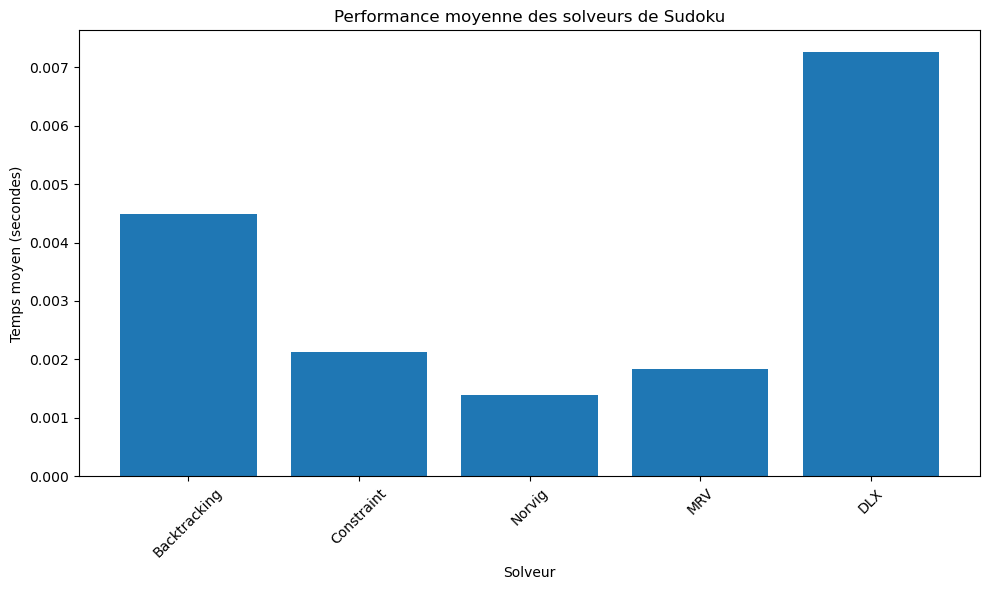

In [ ]:
import matplotlib.pyplot as plt

# Calculer les temps moyens par solveur
average_times = benchmark_results.drop("Grid", axis=1).mean()

# Créer un graphique à barres
plt.figure(figsize=(10, 6))
plt.bar(average_times.index, average_times.values)
plt.xlabel('Solveur')
plt.ylabel('Temps moyen (secondes)')
plt.title('Performance moyenne des solveurs de Sudoku')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

print("\nTest sur des grilles difficiles:")
hard_grids = process_sudoku_file("hard_test.txt")
hard_results = []

# Prendre seulement quelques grilles difficiles pour économiser du temps
for i, grid in enumerate(hard_grids[:5]):
    times = test_all_solvers(grid)
    times["Grid"] = f"Hard {i + 1}"
    hard_results.append(times)

hard_df = pd.DataFrame(hard_results)
cols = hard_df.columns.tolist()
cols.remove("Grid")
cols = ["Grid"] + cols
hard_df = hard_df[cols]

print(hard_df)


Test sur des grilles difficiles:
     Grid  Backtracking  Constraint    Norvig       MRV       DLX
0  Hard 1      6.468558    0.030224  0.072957  1.033256  0.080927
1  Hard 2      0.786062    0.279759  0.002572  0.012877  0.022846
2  Hard 3      3.989877    0.031511  0.026414  0.832438  0.039597
3  Hard 4      7.951967    0.303901  0.054195  0.069414  0.077137
4  Hard 5      0.618543    1.027428  0.006762  0.152901  0.015047


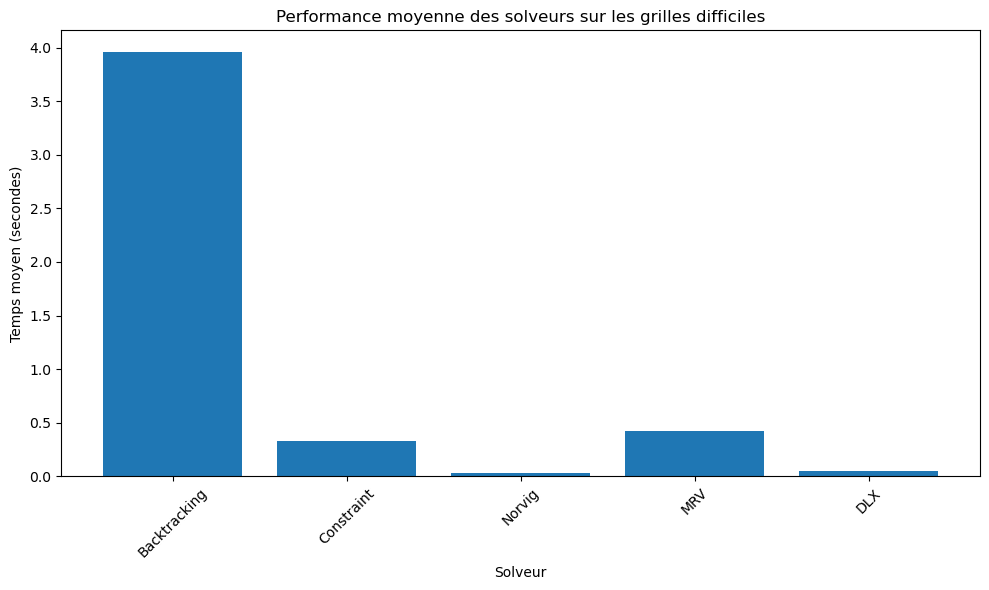

In [ ]:
plt.figure(figsize=(10, 6))
avg_hard_times = hard_df.drop("Grid", axis=1).mean()
plt.bar(avg_hard_times.index, avg_hard_times.values)
plt.xlabel('Solveur')
plt.ylabel('Temps moyen (secondes)')
plt.title('Performance moyenne des solveurs sur les grilles difficiles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
print("\nTest du solveur génétique:")
easy_grid = generate_sudoku(difficulty='facile')
start = time.time()
solution = solve_sudoku_genetic(easy_grid, population_size=200, max_generations=300)
end = time.time()
genetic_time = end - start
print(f"Temps: {genetic_time:.4f} secondes")
print(f"Solution trouvée: {'Oui' if solution else 'Non'}")


Test du solveur génétique:
Temps: 4.0105 secondes
Solution trouvée: Oui



Temps moyens par niveau de difficulté:
            Backtracking  Constraint    Norvig       MRV       DLX
Difficulty                                                        
difficile       0.241226    0.007904  0.001622  0.007580  0.007630
facile          0.000268    0.002478  0.001552  0.001409  0.006717
moyen           0.001856    0.002265  0.001388  0.001844  0.006668


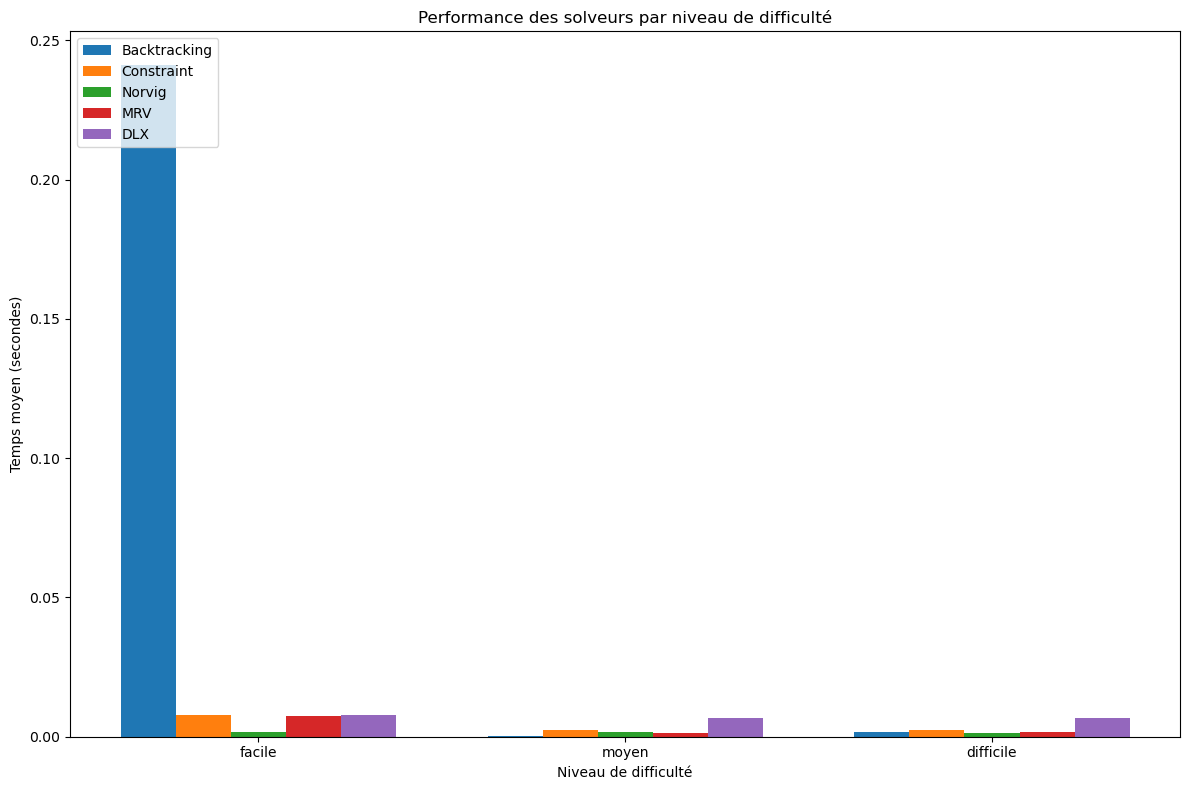

In [56]:

# Analyse détaillée des performances sur des grilles de difficulté croissante
import pandas as pd
import numpy as np

# Tester les solveurs sur des grilles de différentes difficultés
difficulties = ['facile', 'moyen', 'difficile']
difficulty_results = []

for difficulty in difficulties:
    # Générer 5 grilles pour chaque niveau de difficulté
    for i in range(5):
        grid = generate_sudoku(difficulty)
        times = test_all_solvers(grid)
        times["Grid"] = f"{difficulty.capitalize()} {i+1}"
        times["Difficulty"] = difficulty
        difficulty_results.append(times)

# Convertir en DataFrame
diff_df = pd.DataFrame(difficulty_results)

# Sélectionner uniquement les colonnes numériques pour le calcul de la moyenne
numeric_cols = ['Backtracking', 'Constraint', 'Norvig', 'MRV', 'DLX']
grouped = diff_df.groupby('Difficulty')[numeric_cols]
avg_by_difficulty = grouped.mean()

print("\nTemps moyens par niveau de difficulté:")
print(avg_by_difficulty)

# Visualiser les résultats par difficulté
plt.figure(figsize=(12, 8))

# Préparation des données pour le graphique
solvers = numeric_cols
x = np.arange(len(difficulties))
width = 0.15
multiplier = 0

for solver in solvers:
    offset = width * multiplier
    plt.bar(x + offset, avg_by_difficulty[solver], width, label=solver)
    multiplier += 1

plt.xlabel('Niveau de difficulté')
plt.ylabel('Temps moyen (secondes)')
plt.title('Performance des solveurs par niveau de difficulté')
plt.xticks(x + width * 2, difficulties)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()